In [1]:
# import necessary libraries
from PIL import Image
import PIL.ImageOps
from resizeimage import resizeimage

from glob import glob

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA as RandomizedPCA

import matplotlib.image as mpimg


In [2]:
def resize(path_to_image, width, height):
    """ Resize the image and save it again.
        :param path_to_image: os.path
        :param width: int
        :param height: int
        :return: None
        """
    try:
        fd_img = open(path_to_image, 'rb')
        img = Image.open(fd_img)
        img = resizeimage.resize_cover(img, [int(width), int(height)])
        img.save(path_to_image, img.format)
        fd_img.close() 
    except:
        pass

In [3]:
#resize all images
files = glob("/Users/nhatpham/Downloads/LBA/IMG_*.JPG")
[resize(i,256,256) for i in files]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [4]:
#flatten data
import cv2
def flatten(file):
    image = PIL.Image.open(file)
    width, height = image.size
    string_img = cv2.imread(file).reshape(1,width*height*3)
    return(string_img[0])



In [5]:
data = [flatten(file) for file in files]
data

[array([159,  96,  62, ..., 154, 174, 192], dtype=uint8),
 array([  9,   7,   7, ...,  43,  73, 100], dtype=uint8),
 array([157,  93,  62, ..., 140, 161, 176], dtype=uint8),
 array([199, 128,  90, ...,  66,  57,  53], dtype=uint8),
 array([183, 118,  80, ...,  62,  57,  56], dtype=uint8),
 array([28, 23, 24, ..., 47, 58, 80], dtype=uint8),
 array([156,  94,  64, ...,  44,  39,  38], dtype=uint8),
 array([154,  94,  64, ...,  45,  39,  44], dtype=uint8),
 array([29, 24, 25, ..., 52, 63, 85], dtype=uint8),
 array([147,  89,  60, ..., 138, 145, 148], dtype=uint8),
 array([ 15,  11,  10, ..., 222, 250, 255], dtype=uint8),
 array([ 17,  12,  11, ...,  76,  90, 112], dtype=uint8),
 array([154,  94,  64, ...,  46,  40,  45], dtype=uint8),
 array([  9,  10,   8, ...,  47,  76, 107], dtype=uint8),
 array([153,  91,  61, ...,  66,  65,  61], dtype=uint8),
 array([  9,  10,   8, ...,  57,  87, 114], dtype=uint8),
 array([158,  96,  66, ...,  42,  40,  39], dtype=uint8),
 array([ 19,  11,  12, ...

In [6]:
#fit and transform data using pcaa method
pca = RandomizedPCA(n_components=2, random_state=0)
X = pca.fit_transform(data)

Text(0.5, 1.0, 'Scatter plot of 2D pca-ed data')

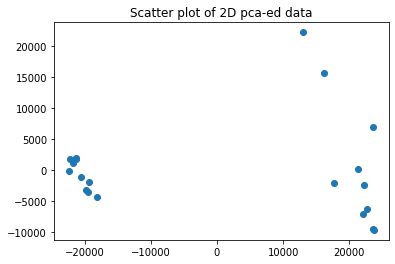

In [7]:
plt.scatter(X[:,0],X[:,1])
plt.title('Scatter plot of 2D pca-ed data')


In [8]:
#reconstruct the img from pca-ed data
restored_image = pca.inverse_transform(X)
restored_image = np.clip(np.reshape(restored_image, (20,256,256,3)), 0,255).astype(np.uint8)


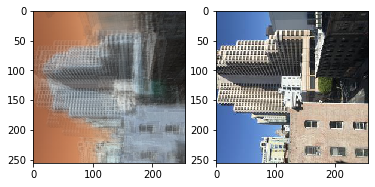

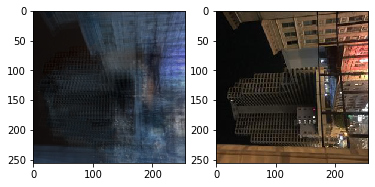

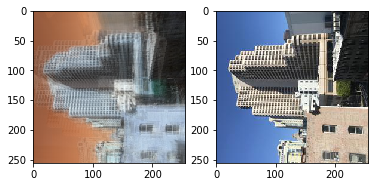

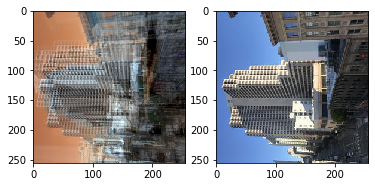

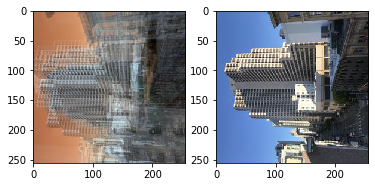

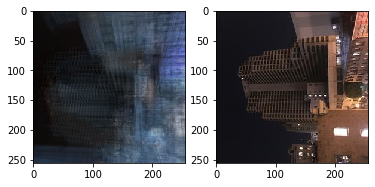

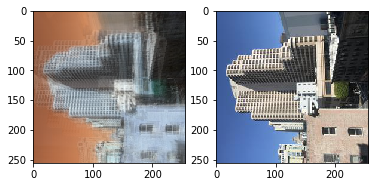

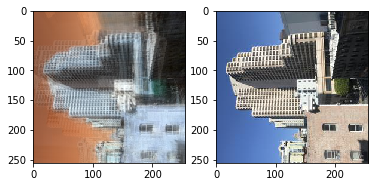

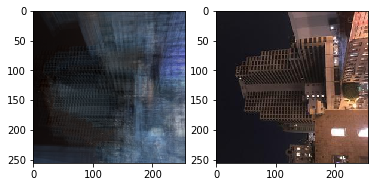

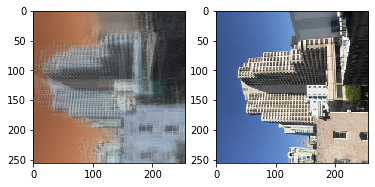

In [9]:
original_img = glob("/Users/nhatpham/Downloads/LBA/IMG_*.JPG")
for i in range(10):
    img = Image.fromarray(restored_image[i], 'RGB')
    
    plt.figure()
    
    plt.subplot(121)
    plt.imshow(img)
    
    plt.subplot(122)
    plt.imshow(mpimg.imread(original_img[i]))

#compare the pce-ed images (left) and original ones (right)

In [10]:
#apply on the a different picture that is not in the set of images used to fit pca

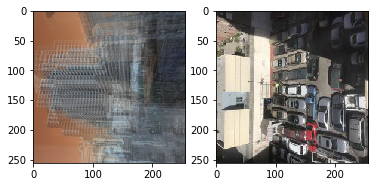

In [12]:
test_img = "/Users/nhatpham/Downloads/LBA/test.JPG"
resize(test_img,256,256)
testimg = flatten(test_img)
testimg = pca.transform([testimg])
restored_image = pca.inverse_transform(testimg)
restored_image = np.clip(np.reshape(restored_image, (1, 256, 256, 3)), 0,255).astype(np.uint8)
restored_image = Image.fromarray(restored_image[0], 'RGB')

#compare pca-ed test image (left) and the original one(right)
#this test image is a picture of a garage near the res hall in SF
plt.figure()
    
plt.subplot(121)
plt.imshow(restored_image)

plt.subplot(122)
plt.imshow(mpimg.imread(test_img))